### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.info())
print(data.isna().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Take a look at each column that has NA values
nacols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
print(data['Bar'].value_counts(dropna=False))

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64


In [6]:
print(data['CoffeeHouse'].value_counts(dropna=False))

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64


In [7]:
print(data['CarryAway'].value_counts(dropna=False))

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64


In [8]:
print(data['RestaurantLessThan20'].value_counts(dropna=False))

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64


In [9]:
print(data['Restaurant20To50'].value_counts(dropna=False))

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# drop the car column
data = data.drop(columns=['car'])

#fix the typo in the column name
data = data.rename(columns={'passanger':'passenger'})

#default the others to 0 when there wasn't a response. There were not a ton of these
#(5% of the total responses had one more more invalid values in one of these columns)
data[nacols] = data[nacols].fillna('never')
data.isna().sum().sort_values(ascending=False)

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [11]:
data['Y'].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

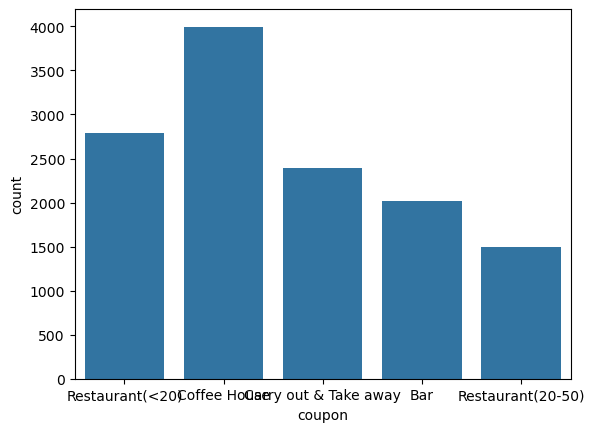

In [12]:
#data['coupon'].value_counts().plot(kind='bar')
sns.countplot(data=data, x='coupon')
plt.show()

6. Use a histogram to visualize the temperature column.

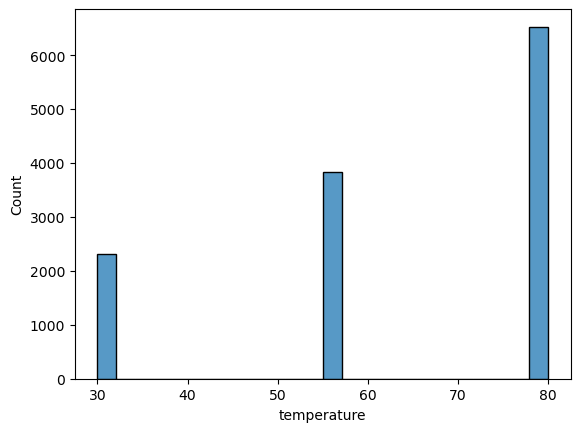

In [13]:
sns.histplot(data=data, x='temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bardf = data[data['coupon']=='Bar'].copy()

2. What proportion of bar coupons were accepted?


In [15]:
bardf['Y'].value_counts(normalize=True)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
lt3 = ['never', 'less1', '1-3']
bardf['Bar_grp'] = np.where(bardf['Bar'].isin(lt3), 'lt3', 'gt3')
#print(bardf['Bar_grp'].value_counts())
#print(bardf['Y'].value_counts())
pd.crosstab(bardf['Bar_grp'], bardf['Y'], normalize='index')

Y,0,1
Bar_grp,,
gt3,0.312081,0.687919
lt3,0.706545,0.293455


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
mask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['age'].isin(['below21', '21'])
)
bardf['Bar_grp2'] = np.where(mask, '25plusBargoers', 'others')
print(bardf['Bar_grp2'].value_counts())
pd.crosstab(bardf['Bar_grp2'], bardf['Y'], normalize='index')

Bar_grp2
others            1597
25plusBargoers     420
Name: count, dtype: int64


Y,0,1
Bar_grp2,,
25plusBargoers,0.304762,0.695238
others,0.664997,0.335003


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:
print(bardf['passenger'].value_counts(dropna=False))
print(bardf['occupation'].value_counts(dropna=False))
mask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['passenger'].isin(['Alone', 'Kid(s)']) &
    ~bardf['occupation'].isin(['Farming Fishing & Forestry'])
)

#Added these two to understand the data since it didn't change with the last condition
pd.crosstab(bardf[bardf['occupation'] == 'Farming Fishing & Forestry']['occupation'], bardf['passenger'])
pd.crosstab(bardf[bardf['occupation'] == 'Farming Fishing & Forestry']['occupation'], bardf['Bar'])

bardf['Bar_grp3'] = np.where(mask, 'noKidBargoersNotoutdoors', 'others')
print(bardf['Bar_grp3'].value_counts())
pd.crosstab(bardf['Bar_grp3'], bardf['Y'], normalize='index')


passenger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64
occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Healthcare Support                            44
Community & Social Services                   44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27

Y,0,1
Bar_grp3,,
noKidBargoersNotoutdoors,0.282051,0.717949
others,0.622942,0.377058


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [21]:
#print(bardf['maritalStatus'].value_counts(dropna=False))
#print(bardf['age'].value_counts(dropna=False))
#print(bardf['income'].value_counts(dropna=False))
#print(bardf['RestaurantLessThan20'].value_counts(dropna=False))

noKidNotWidowedBargoerMask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['passenger'].isin(['Alone', 'Kid(s)']) &
    ~bardf['maritalStatus'].isin(['Widowed'])
)
under26BargoerMask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    bardf['age'].isin(['below21', '21', '26'])
)
restGoerlt50kMask = (
    bardf['RestaurantLessThan20'].isin(['4-8', 'gt8']) &
    bardf['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
)

mask = ( noKidNotWidowedBargoerMask | under26BargoerMask | restGoerlt50kMask)
bardf['Bar_grp4'] = np.where(mask, 'matchesThreeCases', 'others')
print(bardf['Bar_grp4'].value_counts())
print(pd.crosstab(bardf['Bar_grp4'], bardf['Y'], normalize='index'))

# Look at the groups individually as well
bardf['Bar_grp4a'] = np.where(noKidNotWidowedBargoerMask, 'noKidNotWidowedBargoer', 'others')
print(pd.crosstab(bardf['Bar_grp4a'], bardf['Y'], normalize='index'))

bardf['Bar_grp4b'] = np.where(under26BargoerMask, 'under26Bargoer', 'others')
print(pd.crosstab(bardf['Bar_grp4b'], bardf['Y'], normalize='index'))

bardf['Bar_grp4c'] = np.where(restGoerlt50kMask, 'restGoerlt50k', 'others')
print(pd.crosstab(bardf['Bar_grp4c'], bardf['Y'], normalize='index'))


Bar_grp4
others               1523
matchesThreeCases     494
Name: count, dtype: int64
Y                         0         1
Bar_grp4                             
matchesThreeCases  0.325911  0.674089
others             0.675640  0.324360
Y                              0         1
Bar_grp4a                                 
noKidNotWidowedBargoer  0.282051  0.717949
others                  0.622942  0.377058
Y                      0         1
Bar_grp4b                         
others          0.654306  0.345694
under26Bargoer  0.278261  0.721739
Y                     0         1
Bar_grp4c                        
others         0.599167  0.400833
restGoerlt50k  0.406250  0.593750


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [22]:
# It looks lik the coupons will be taken advantage of by people who are already bar goers.
# It would be interesting to get more data about how it is actually changing behavior and affecting revenue
noKidBargoerMask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['passenger'].isin(['Alone', 'Kid(s)'])
)
bardf['Bar_nokidbargoers'] = np.where(noKidBargoerMask, 'noKidBargoer', 'others')
print(pd.crosstab(bardf['Bar_nokidbargoers'], bardf['Y'], normalize='index'))

print(pd.crosstab(bardf['income'], bardf['Y'], normalize='index'))


Y                         0         1
Bar_nokidbargoers                    
noKidBargoer       0.282051  0.717949
others             0.622942  0.377058
Y                        0         1
income                              
$100000 or More   0.525773  0.474227
$12500 - $24999   0.583333  0.416667
$25000 - $37499   0.550314  0.449686
$37500 - $49999   0.651685  0.348315
$50000 - $62499   0.587786  0.412214
$62500 - $74999   0.646154  0.353846
$75000 - $87499   0.622517  0.377483
$87500 - $99999   0.682759  0.317241
Less than $12500  0.539394  0.460606


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
print(data['coupon'].value_counts(dropna=False))

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


# Independent Exploration
## Hypothesis
Coupons while driving are about impulse buys. As a result, we are going to look at coupon adoption rates at different times of the day and who is with the driver.

## Data prep for presentation
The strings that are used for time of day and what passengers may exit do not lend themselve to an alphanumeric sort that makes logical sense, so we'll use the Categorical data type and set an explicit order.

In [24]:
# Set an ordering to the time and passenger columns since the standard alphanumeric sort doesn't work
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
data['time'] = pd.Categorical(
    data['time'],
    categories = time_order,
    ordered = True
)
passenger_order = ['Kid(s)', 'Alone', 'Partner', 'Friend(s)']
data['passenger'] = pd.Categorical(
    data['passenger'],
    categories = passenger_order,
    ordered = True
)

## Helper functions
After doing some initial data exploration by hand, it because obvious that I wanted to repeatedly run the same analysis on the different kinds of coupons. As a result, I refactored code into two functions:

*createCouponTypeDF*

Create a separate dataframe that has just the entries for a particular type of coupon.

At the same time, add a new column, called *frequentsType* that has a *0* if the user has a value less than one in its frequency column for that type of establishment, and a *1* if the value is larger. The point of this new column is to group users into those that frequently attend the given type of establishment.

We will then use this new function to create separate data frames for each of the coupon types.

In [25]:
# Create a method to create a subset of data for each coupon type
# Also create group feature added that indicates if the user frequents that kind of establishment
# This will be 0 if they fall into the category of "never" or "less1", otherwise 1
# The different frequency columns are: 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
# The different values for the coupon column are: 'Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)'
def createCouponTypeDF(df, coupon, freqCol):
    cdf = df[df['coupon'] == coupon].copy()
    mask = (
        ~cdf[freqCol].isin(['never', 'less1'])
    )
    cdf['frequentsType'] = np.where(mask, 1, 0)

    return(cdf)

bardf = createCouponTypeDF(data, 'Bar', 'Bar')
chdf = createCouponTypeDF(data, 'Coffee House', 'CoffeeHouse')
restlt20df = createCouponTypeDF(data, 'Restaurant(<20)', 'RestaurantLessThan20')
rest2050df = createCouponTypeDF(data, 'Restaurant(20-50)', 'Restaurant20To50')
carryoutdf = createCouponTypeDF(data, 'Carry out & Take away', 'CarryAway')

*acceptance_heatmap*

This function takes a data frame and displays a heatmap for coupon acceptance along two other dimensions.
This defaults to time and passenger since these are the two dimensions I was using it for, but those can be overridden.

In [26]:
def acceptance_heatmap(df, colx='time', coly='passenger', colz='Y',
                       query=None, title=None, ax=None):
    # filter
    data = df.query(query) if query else df
    
    # compute rates
    pivot = (data.groupby([colx, coly], observed=True)[colz]
               .mean()
               .unstack(colx))

    # make a fresh axes if caller didn't pass one
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
        created_fig = True

    sns.heatmap(pivot, ax=ax, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="viridis")
    ax.set_title(title or "Acceptance rate")
    ax.set_xlabel(colx)
    ax.set_ylabel(coly)

    if created_fig:
        plt.tight_layout()
        plt.show()
        plt.close(fig)  # important in notebooks / loops

    return ax


We will run an analysis using these functions on each coupon type separately.

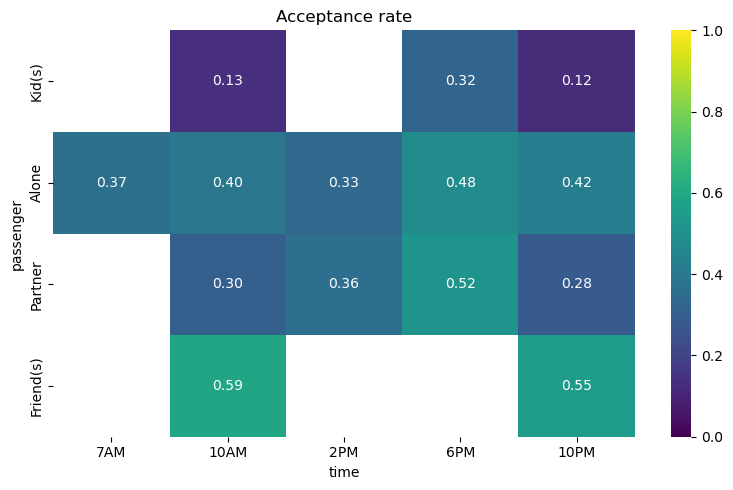

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [27]:
# Heatmap of all users shown Bar coupons
acceptance_heatmap(bardf)

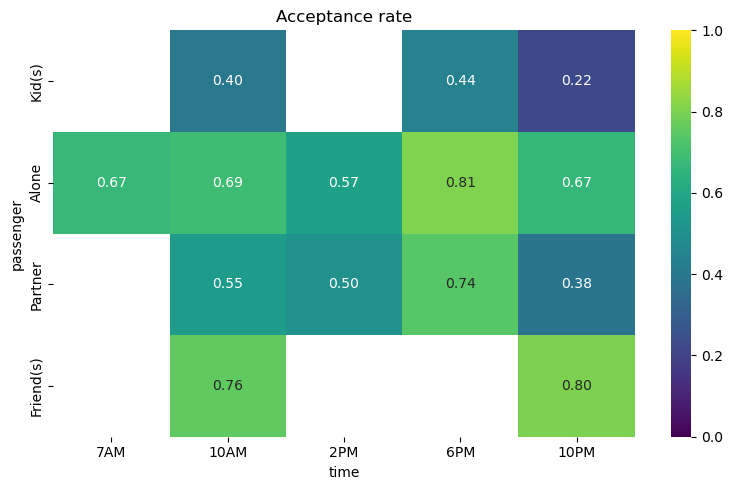

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [28]:
# Look at the coupon habits for bargoers based on time of day and who is in the car with them
acceptance_heatmap(bardf, query='frequentsType == 1')

In [29]:
# What portion of users shown Bar Coupons were bar goers
bardf['frequentsType'].value_counts(normalize=True)

frequentsType
0    0.704512
1    0.295488
Name: proportion, dtype: float64

## Analysis of Bar Coupons

This shows that a Bar coupons are only really used by bar goers

This is something that can be improved upon because most people (over 70%) that were shown a bar coupon were not bar goers.

Bar goers will use a coupon alone in the evening or with a friend, but not with a kid

With their partner, they are a bit less likely to use a coupon than alone, although in the evening it is still likely.

*Does this apply to other types of establishments*

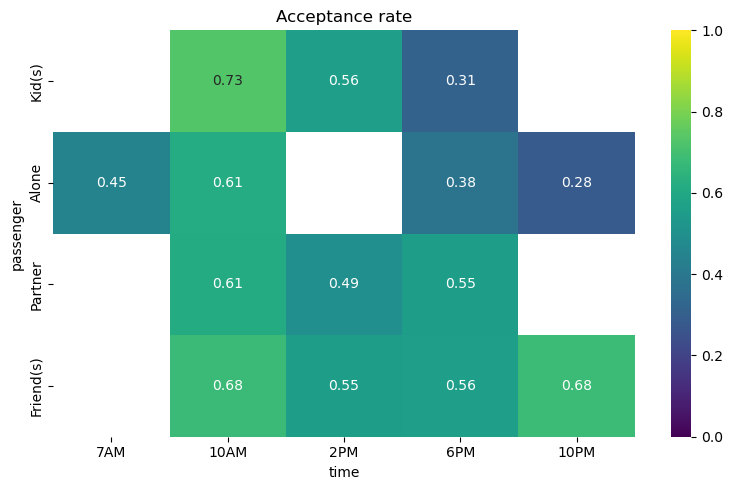

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [30]:
# All coffee house coupons shown to all users
acceptance_heatmap(chdf)

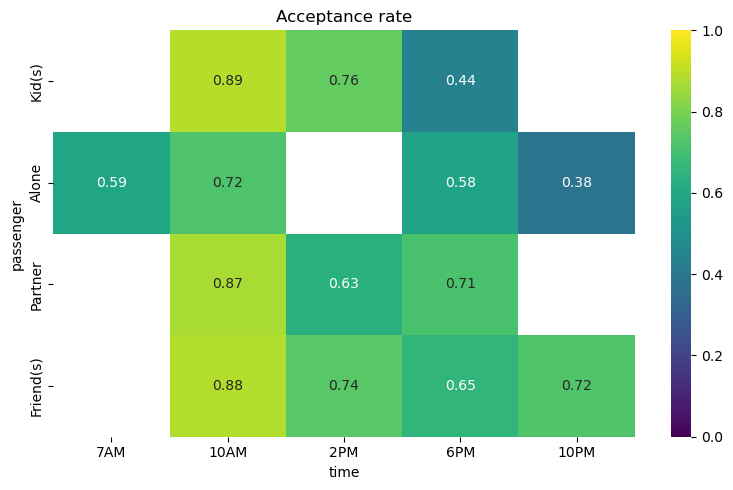

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [31]:
# Coffee house coupons shown to coffee house goers
acceptance_heatmap(chdf, query='frequentsType == 1')

In [32]:
# How often were Coffee House coupons shown to people that go to Coffee Houses
chdf['frequentsType'].value_counts(normalize=True)

frequentsType
0    0.519019
1    0.480981
Name: proportion, dtype: float64

## Analysis of Coffee House Coupons

Non-coffee drinkers will rarely use a coupon if they are alone or with kids (except in the mid-morning).

Howver, when they are with friends or a partner, they are more likely to take advantage of the coupon, perhaps because it gives them an excuse to treat themselves to a coffee or perhaps because their partner or friend likes coffee.

Coffee drinkers, however, will generally use a coupon as long as it isn't late at night. They are expecially inclined when with friends or with a partner.

Curiously, in the morning and the middle of the day, coffee drinkers were even more likely to use a coupon when they had kids with them than when they were alone. Perhaps this is because of how tired people with kids can get but they need a pick me up since they won't get to rest until the end of the day.

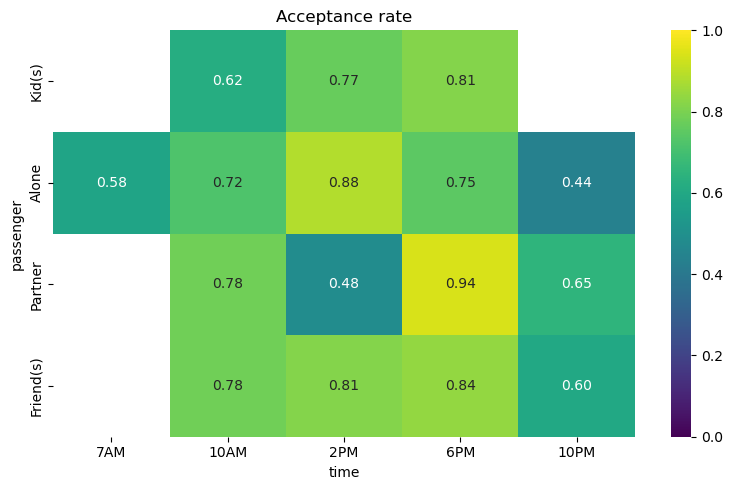

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [33]:
# All inexpensive restaurant coupons shown to all users
acceptance_heatmap(restlt20df)

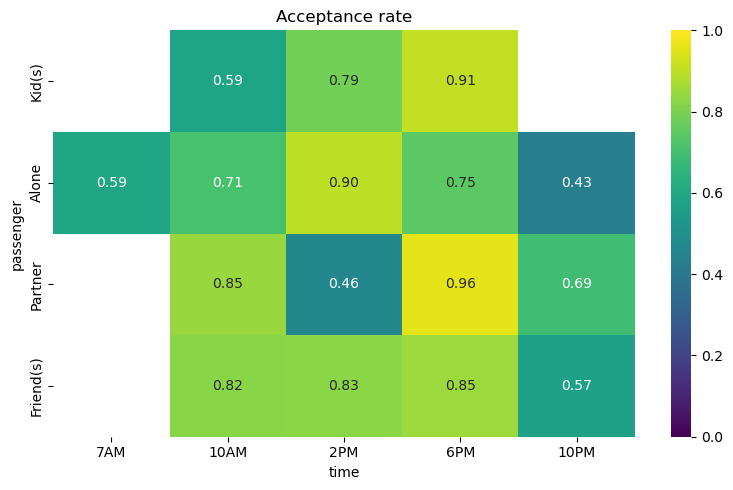

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [34]:
acceptance_heatmap(restlt20df, query='frequentsType == 1')

In [35]:
restlt20df['frequentsType'].value_counts(normalize=True)

frequentsType
1    0.805815
0    0.194185
Name: proportion, dtype: float64

# Analysis of Inexpensive Restaurant Coupons

This is the first group we have looked at where a large majority of coupons were shown to frequent visitors to this type of establishment (probably because everyone has to eat, but not everyone drinks alcohol or coffee).

The usage of these coupons are high from mid morning to the evening with an odd dip for people who were with their partners in the mid-afternoon. More analysis of this is warranted.

It is notable that there is an extremely high rate of adoption of these coupons in the evening, especially when the driver is not alone.

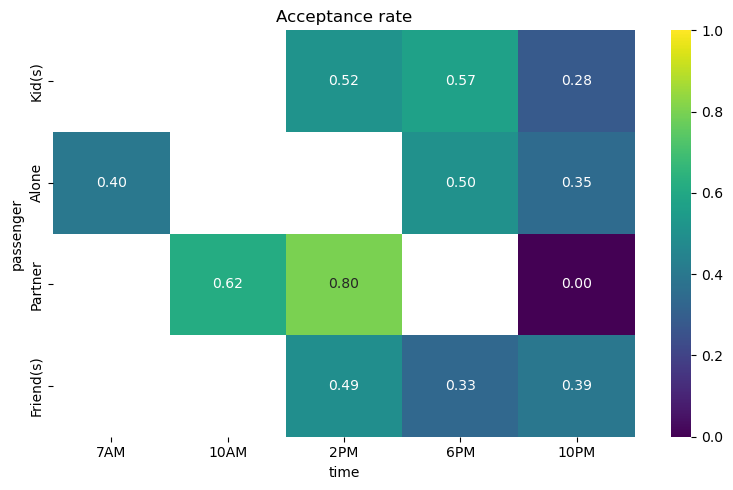

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [36]:
# All more expensive restaurant coupons shown to all users
acceptance_heatmap(rest2050df)

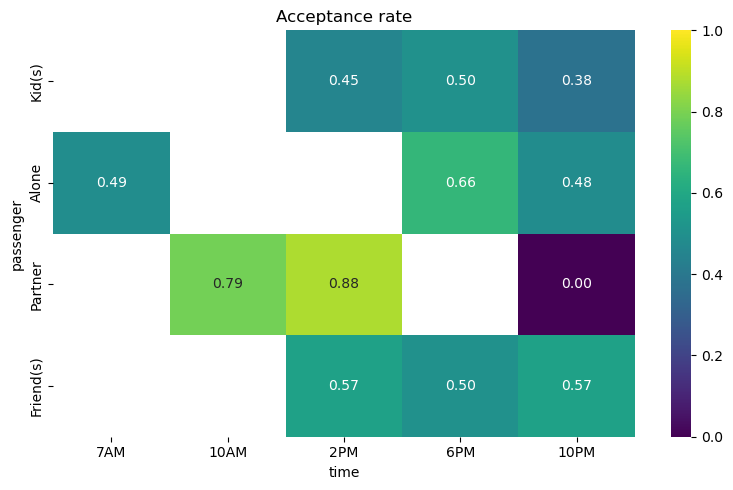

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [37]:
acceptance_heatmap(rest2050df, query='frequentsType == 1')

In [38]:
rest2050df['frequentsType'].value_counts(normalize=True)

frequentsType
0    0.660858
1    0.339142
Name: proportion, dtype: float64

# Analysis of More Expensive Restaurant Coupons

The obvious takeway about this type of coupon is that it is especially effective when a person is with their partner.

This makes sense if one figures a more expensive meal as being something special that one does with their partner, such as for a date.

The high acceptance rates in the mid-morning and early afternoon beg the question as to whether or not people are planning a more expensive dinner.

It may be useful to go back to the original data and split out when people are using the coupon immediately versus saving it for use later in the day.

It also stands out that there was no coupon data for people travelling with partners in the evening, when one might think would be the best time for a couple to choose to use a coupon for a nice dinner.

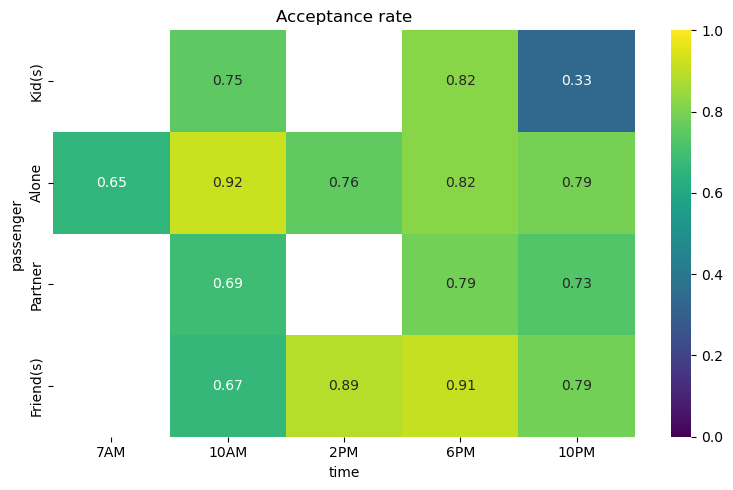

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [39]:
# All carryout restaurant coupons shown to all users
acceptance_heatmap(carryoutdf)

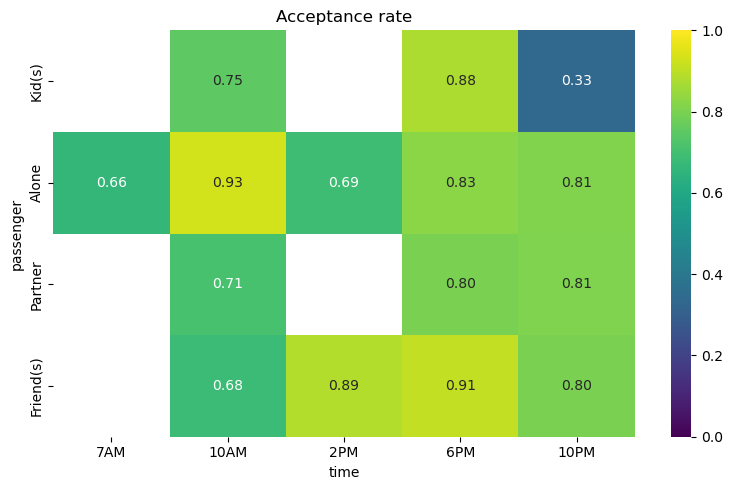

<Axes: title={'center': 'Acceptance rate'}, xlabel='time', ylabel='passenger'>

In [40]:
acceptance_heatmap(carryoutdf, query='frequentsType == 1')

In [41]:
carryoutdf['frequentsType'].value_counts(normalize=True)

frequentsType
1    0.829921
0    0.170079
Name: proportion, dtype: float64

# Analysis of Take Out Coupons

As with inexpensive restaurants, most people who received coupons for carry out restaurants were frequent users of those establishments.

Another parallel is that these coupons were also accepted at a very high rate, expecially at dinnertime. There was also a spike for individuals in the mid-morning, perhaps showing busy people getting a bit to eat by themselves in the middle of the day.

It is also worth noting that unlike restaurant coupons, carry out coupons were popular at night, except for those with kids at night who appear to be interested in nothing other than getting their kids to bed.

# Conclusion

Time of day and who one is travelling with appears to be highly correlated with their use of coupons of different kinds of establishments.

## Recommendation
In order to maximize adoption of coupons, an attempt could be made to:
1. Show coffee coupons until the early afternoon
2. Show inexpensive restaurant coupons from the mid morning through the evening.
3. Show take out coupons from the morning through the end of the day.
4. Show coupons for more expensive restaurants to people who are travelling with their partners.
5. Show bar coupons to those who have shown that they go to bars and are not travelling with kids.
6. If a user is travelling with kids, focus on showing them carryout and inexpensive food coupons throughout the day and coffee until the mid-afternoon.

## Additional steps
More analysis can be done to take into account where a user was going or if they were using a coupon immediately or planning on using it later.

To full understand the actual business impact of these coupons, looking into actual changes in behavior would be interesting. Are the coupons just saving money for drivers who would have made the same purchases without the coupons or are they actually causing drivers to spend more on these categories?
